$$\text{Intelligent Computing Project}$$

<b>Objective:</b>

Train a perceptron on the ionosphere dataset to predict the radar return values (binary classification).

<b>Dataset:</b>

The relevant dataset can be found at <a href="https://archive.ics.uci.edu/dataset/52/ionosphere">UCI Machine Learning Repository</a>

<h5>Importing necessary libraries</h5>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
data  = pd.read_csv('ionosphereData.csv', header=None)

headers = ["Attribute"+str(i) for i in range(1,35)]
headers.append("Class") # Add the class label column
data.columns = headers

In [3]:
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
data.shape

(351, 35)

In [5]:
if (data["Attribute2"] == 0).all():
    print("All values in column 2 are 0.")
    print("Hence the column is redundant and is dropped.")
    data = data.drop(columns=["Attribute2"], axis=1)

else:
    print("Not all values in column 2 are 0")

All values in column 2 are 0.
Hence the column is redundant and is dropped.


In [6]:
data.shape

(351, 34)

In [7]:
columns = data.columns

correlationMatrix = data.corr()

print(correlationMatrix)

             Attribute1  Attribute3  Attribute4  Attribute5  Attribute6  \
Attribute1     1.000000    0.302034   -0.006529    0.156152    0.127606   
Attribute3     0.302034    1.000000    0.143365    0.476587    0.025768   
Attribute4    -0.006529    0.143365    1.000000    0.001152   -0.190308   
Attribute5     0.156152    0.476587    0.001152    1.000000    0.038323   
Attribute6     0.127606    0.025768   -0.190308    0.038323    1.000000   
Attribute7     0.221867    0.440254   -0.054030    0.597075   -0.010227   
Attribute8     0.027079    0.008717    0.255003   -0.029794    0.274747   
Attribute9     0.189242    0.471614   -0.302317    0.450454   -0.120712   
Attribute10   -0.051883    0.047916    0.207697   -0.034236    0.200080   
Attribute11    0.034138    0.325016   -0.190090    0.449829   -0.291447   
Attribute12    0.072216    0.169981    0.315877    0.042896    0.163933   
Attribute13    0.102558    0.217597   -0.149216    0.482118   -0.307197   
Attribute14    0.199230  

C:\Users\jayad\AppData\Local\Temp\ipykernel_23752\22069406.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = data.corr()


<AxesSubplot:>

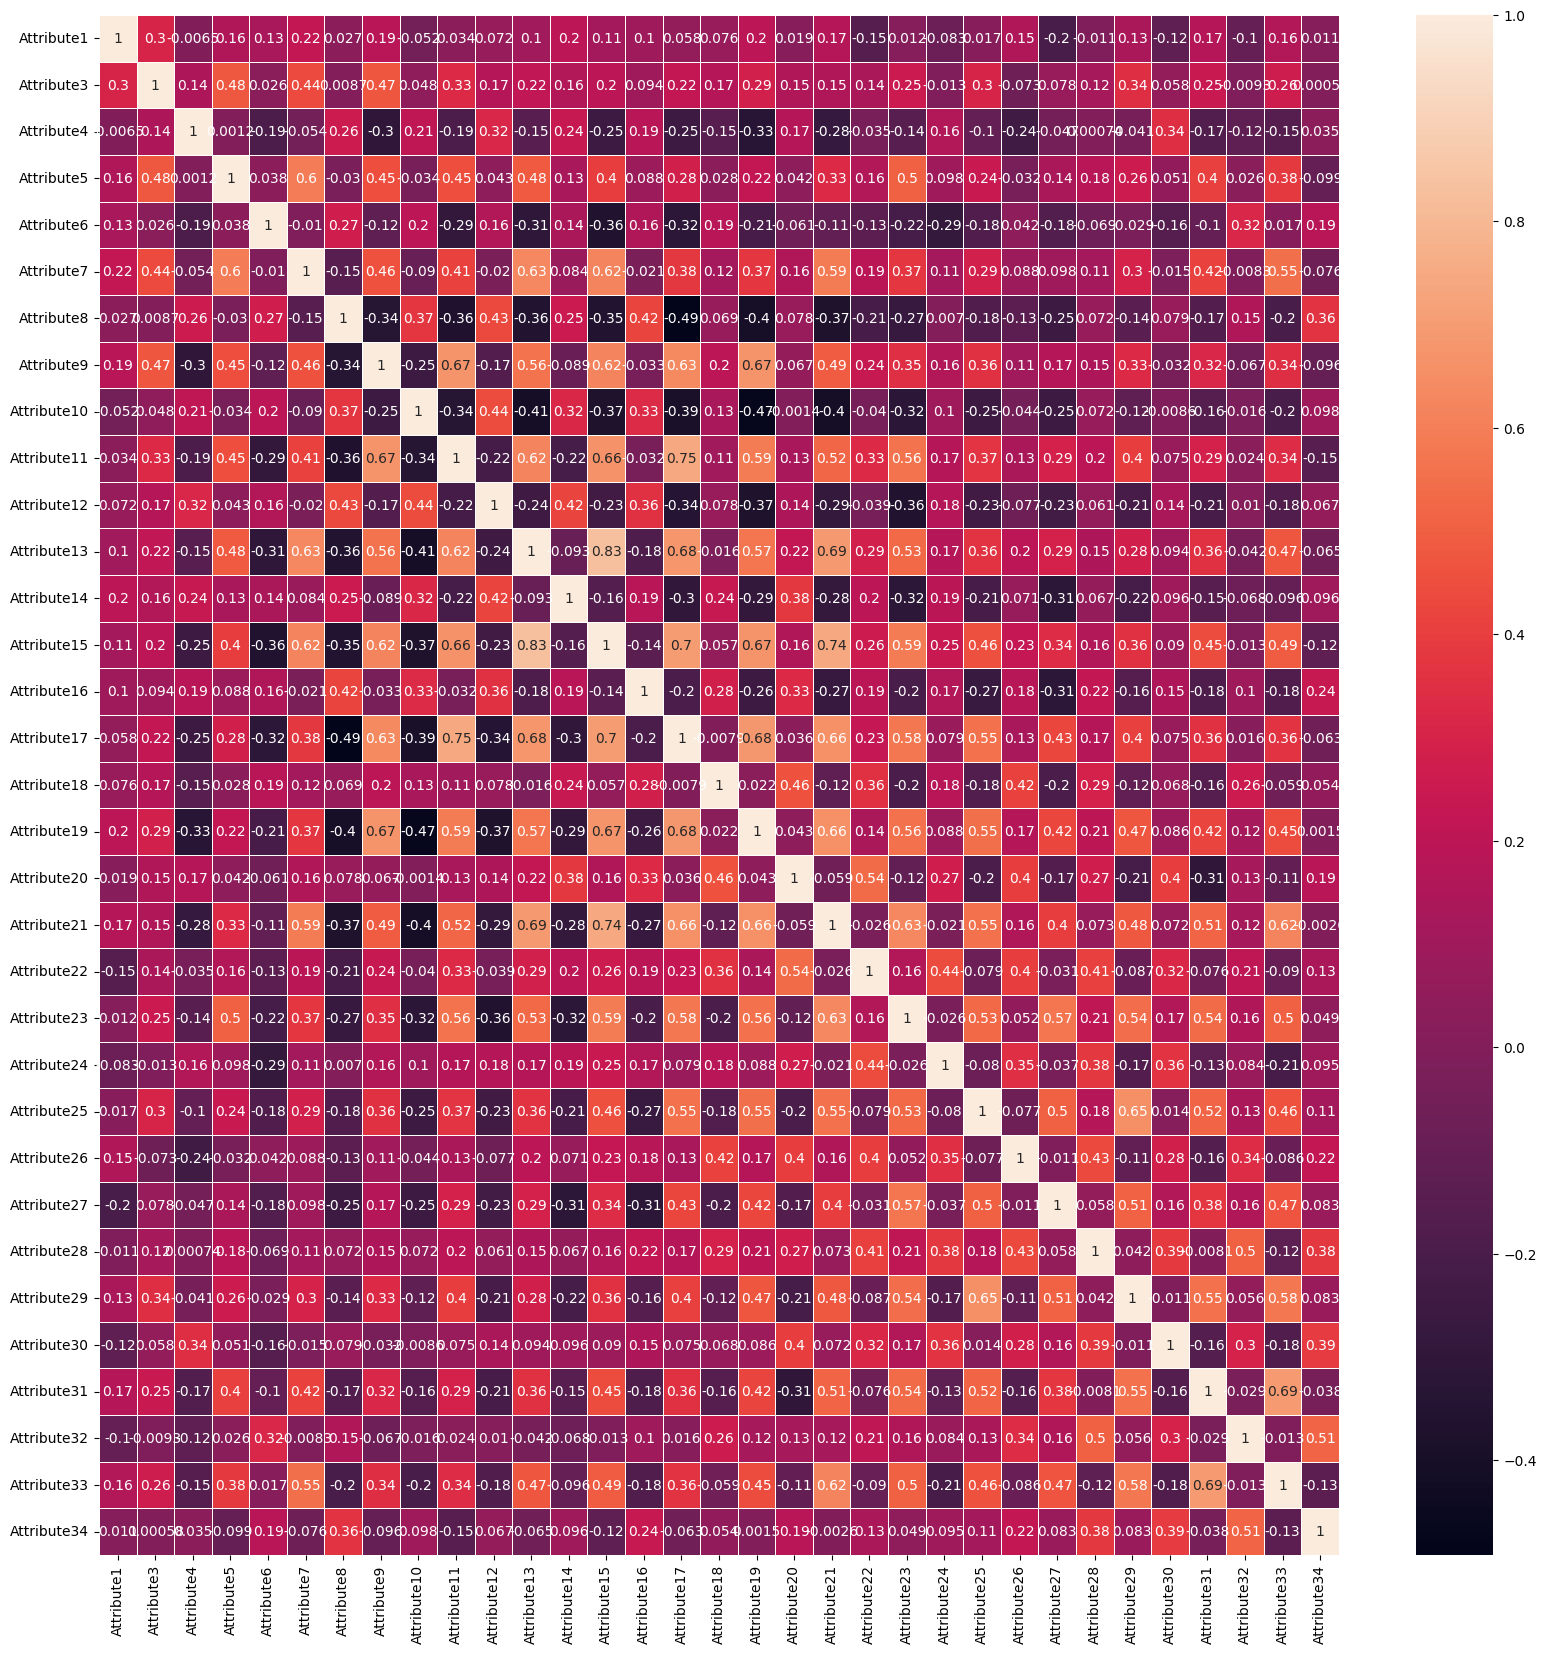

In [8]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(correlationMatrix, annot=True, linewidths=.5, ax=ax)

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values     


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (280, 33)
X_test shape:  (71, 33)
y_train shape:  (280,)
y_test shape:  (71,)


In [11]:
print(X_train[:5])


[[ 1.       1.       0.24168  1.       0.4859   1.       0.72973  1.
   1.       1.       1.       1.       1.       1.       0.77128  1.
   1.       1.       1.       0.74468  1.       0.89647  1.       0.64628
   1.       0.38255  1.       0.10819  1.      -0.1737   1.      -0.81383
   1.     ]
 [ 1.       0.88305 -0.21996  1.       0.36373  0.82403  0.19206  0.85086
   0.05901  0.90558 -0.04292  0.85193  0.25     0.77897  0.25322  0.69206
   0.5794   0.7103   0.39056  0.73176  0.27575  1.       0.34871  0.5676
   0.52039  0.69811  0.53235  0.80901  0.58584  0.43026  0.70923  0.52361
   0.54185]
 [ 1.       0.99645  0.06468  1.      -0.01236  0.97811  0.02498  0.96112
   0.02312  0.99274  0.07808  0.89323  0.10346  0.94212  0.05269  0.88809
   0.1112   0.86104  0.08631  0.81633  0.1183   0.83668  0.14442  0.81329
   0.13412  0.79476  0.13638  0.7911   0.15379  0.77122  0.1593   0.70941
   0.12015]
 [ 1.       1.       0.28046  1.       0.02477  1.       0.07764  1.
   0.04317  0.9876

In [12]:
print(y_train)

['g' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b'
 'b' 'g' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'b'
 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g'
 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'g'
 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g'
 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'g'
 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'b' 'b' 'b' 'g' 'b' 'b' 'g' 'b' 'b'
 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'g' 'b' 'g'
 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g

In [13]:
print(X_test[:5])

[[ 1.       0.4709   0.22751  0.42328  0.33598  0.25661  0.47619  0.01852
   0.49471 -0.02116  0.53968 -0.34127  0.31217 -0.4127   0.3254  -0.51587
   0.06878 -0.5     -0.1164  -0.14815 -0.1455  -0.14815 -0.38095 -0.2328
   0.00265  0.03574 -0.31739  0.15873 -0.21693  0.24868 -0.24339  0.2672
   0.04233]
 [ 1.       0.82254 -0.07572  0.80462  0.00231  0.87514 -0.01214  0.86821
  -0.07514  0.72832 -0.11734  0.84624  0.05029  0.83121 -0.07399  0.74798
   0.06705  0.78324  0.06358  0.86763 -0.0237   0.78844 -0.06012  0.74451
  -0.0237   0.76717 -0.02731  0.74046 -0.0763   0.70058 -0.0422   0.78439
   0.01214]
 [ 1.       0.89589  0.39286  0.66129  0.71804  0.29521  0.90824 -0.04787
   0.94415 -0.45725  0.84605 -0.7766   0.58511 -0.92819  0.25133 -0.92282
  -0.15315 -0.76064 -0.48404 -0.50931 -0.76197 -0.14895 -0.88591  0.21581
  -0.85703  0.53229 -0.68593  0.74846 -0.40656  0.83142 -0.07029  0.76862
   0.27926]
 [ 1.       0.68729  1.       0.91973 -0.76087  0.81773  0.04348  0.76087
   0

In [14]:
print(y_test)

['g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b' 'b' 'g'
 'b' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b']


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [16]:
# Convert 'g' to 1 and 'b' to 0
y_train = (y_train == 'g').astype(int)
y_test = (y_test == 'g').astype(int)


In [17]:
print(y_test)

[1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0]


<h4>Tensorflow trying</h4>

In [18]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.8093 - accuracy: 0.4679 - val_loss: 0.6519 - val_accuracy: 0.6901
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6571 - val_loss: 0.5474 - val_accuracy: 0.8451
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5123 - accuracy: 0.7821 - val_loss: 0.4789 - val_accuracy: 0.9296
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.8321 - val_loss: 0.4342 - val_accuracy: 0.9014
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8536 - val_loss: 0.4042 - val_accuracy: 0.9155
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3475 - accuracy: 0.8643 - val_loss: 0.3832 - val_accuracy: 0.9155
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3211 - accuracy: 0.8750 - val_loss: 0.3677 - val_accuracy: 0.9155
Epoch 8/100
9/9 [=========

In [19]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(33, 64) dtype=float32, numpy=
 array([[-0.03688471,  0.28258407,  0.00167521, ..., -0.11068533,
         -0.14532503,  0.08739395],
        [ 0.08586592, -0.15660757, -0.09439264, ...,  0.21389227,
         -0.11131591, -0.01897378],
        [-0.10064427, -0.06980898,  0.1542362 , ..., -0.20454617,
          0.16312669,  0.17932196],
        ...,
        [-0.10161498, -0.19900613, -0.02846917, ..., -0.17624982,
         -0.20289053, -0.17722481],
        [ 0.11894006,  0.1927807 ,  0.179399  , ..., -0.04412728,
          0.2907742 ,  0.14094494],
        [-0.16610932, -0.04085512,  0.14823392, ..., -0.11839592,
         -0.06748003,  0.39272323]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.24581115,  0.18055205,  0.20333424,  0.22274731, -0.06573003,
        -0.02421552, -0.09099162, -0.01909621,  0.30884093, -0.09263816,
        -0.10404766, -0.10311603,  0.00768193,  0.02954682, -0.10374351,
       

In [20]:
model.get_layer(index=0).get_weights()

[array([[-0.03688471,  0.28258407,  0.00167521, ..., -0.11068533,
         -0.14532503,  0.08739395],
        [ 0.08586592, -0.15660757, -0.09439264, ...,  0.21389227,
         -0.11131591, -0.01897378],
        [-0.10064427, -0.06980898,  0.1542362 , ..., -0.20454617,
          0.16312669,  0.17932196],
        ...,
        [-0.10161498, -0.19900613, -0.02846917, ..., -0.17624982,
         -0.20289053, -0.17722481],
        [ 0.11894006,  0.1927807 ,  0.179399  , ..., -0.04412728,
          0.2907742 ,  0.14094494],
        [-0.16610932, -0.04085512,  0.14823392, ..., -0.11839592,
         -0.06748003,  0.39272323]], dtype=float32),
 array([ 0.24581115,  0.18055205,  0.20333424,  0.22274731, -0.06573003,
        -0.02421552, -0.09099162, -0.01909621,  0.30884093, -0.09263816,
        -0.10404766, -0.10311603,  0.00768193,  0.02954682, -0.10374351,
        -0.1060581 ,  0.2508158 , -0.09557165,  0.15607306, -0.17656018,
        -0.02632419,  0.26232997,  0.443771  ,  0.22376767, -0.038

In [21]:
model.get_layer(index=1).get_weights()

[array([[ 0.2627204 ],
        [ 0.26383093],
        [ 0.34381154],
        [ 0.26878372],
        [-0.35607147],
        [-0.4629268 ],
        [-0.329489  ],
        [-0.33179513],
        [ 0.21192436],
        [-0.35906214],
        [-0.20520192],
        [-0.37347257],
        [-0.3312804 ],
        [ 0.21148339],
        [-0.3563691 ],
        [-0.48345748],
        [ 0.3052139 ],
        [-0.2608504 ],
        [ 0.2393246 ],
        [-0.35542175],
        [-0.410448  ],
        [ 0.31728986],
        [ 0.26177692],
        [ 0.36869812],
        [ 0.23597805],
        [-0.37975663],
        [-0.36479598],
        [ 0.17694324],
        [ 0.26629806],
        [-0.4009706 ],
        [ 0.32690644],
        [ 0.40304634],
        [-0.51206034],
        [-0.44976053],
        [ 0.38216576],
        [-0.3592248 ],
        [-0.24582705],
        [-0.28916672],
        [ 0.2630566 ],
        [ 0.26217905],
        [ 0.29959357],
        [-0.3820409 ],
        [-0.24595521],
        [ 0

# Useful activation functions and their derivatives

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def tanh(x):
    return np.tanh(x)

def derSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def derRelu(x):
    return np.where(x<=0, 0, 1)

def derTanh(x):
    return 1 - np.square(np.tanh(x))

# Single Layer Perceptron

In [23]:
class Perceptron:

    def __init__(self, input_size:int,activation:str = "sigmoid" ,learning_rate: float = 0.1):
        
        self.weights = [(rnd.random()-0.5)*2 for i in range(input_size+1)]
        self.learning_rate = learning_rate
        self.activation = activation
    
    def train(self, input_data, lables):
        print("Training Perceptron...")
        print("Number of instances: ", len(input_data))
        print("Number of attributes: ", len(input_data[0]))
        print("Learning rate: ", self.learning_rate)
        error = 0
        for i in tqdm(range(len(input_data))):

            instance = input_data[i]
            instance = np.append(instance, 1)
            true_label = lables[i]
            output = np.dot(instance, self.weights)

            if self.activation=="sigmoid":
                output = sigmoid(output)
                if output >= 0.5:
                    predicted_label = 1
                else:
                    predicted_label = 0
            elif self.activation=="relu":
                output = relu(output)
                if output >= 0:
                    predicted_label = 1
                else:
                    predicted_label = 0
            else:
                output = tanh(output)
                if output >= 0:
                    predicted_label = 1
                else:
                    predicted_label = 0
            
            if true_label!=predicted_label:
                error += 1
                if self.activation=="sigmoid":
                    delta = (true_label - output) * derSigmoid(output)
                elif self.activation=="relu":
                    delta = (true_label - output) * derRelu(output)
                else:
                    delta = (true_label - output) * derTanh(output)
                
                self.weights = list(self.weights[i]-self.learning_rate*delta*instance[i] for i in range(len(self.weights)))
        
        print("Training complete.")
        # print("Final error: ", error)
    

    def predict(self, input_data):
        print("Predicting...")
        print("Number of instances: ", len(input_data))
        print("Number of attributes: ", len(input_data[0]))
        predictions = []
        for i in tqdm(range(len(input_data))):
            instance = input_data[i]
            instance = np.append(instance, 1)
            output = np.dot(instance, self.weights)
            if self.activation=="sigmoid":
                output = sigmoid(output)
                if output <= 0.5:
                    predictions.append(1)
                else:
                    predictions.append(0)
            elif self.activation=="relu":
                output = relu(output)
                if output <= 0:
                    predictions.append(1)
                else:
                    predictions.append(0)
            else:
                output = tanh(output)
                if output <= 0:
                    predictions.append(1)
                else:
                    predictions.append(0)
        print("Prediction complete.")
        return predictions

    def accuracy(self, predictions, true_labels):
        print("Calculating accuracy...")
        print("Number of instances: ", len(predictions))
        correct = 0
        for i in tqdm(range(len(predictions))):
            if predictions[i]==true_labels[i]:
                correct += 1
        print("Accuracy: ", correct/len(predictions))
        return correct/len(predictions)
    
    def getWeights(self):
        return self.weights            

In [24]:
p = Perceptron(input_size=33, activation="sigmoid", learning_rate=0.4)
p.train(X_train, y_train)

Training Perceptron...
Number of instances:  280
Number of attributes:  33
Learning rate:  0.4


100%|██████████| 280/280 [00:00<00:00, 35880.51it/s]

Training complete.


In [25]:
preds = p.predict(X_train)
train_acc = p.accuracy(preds, y_train)
print("Train accuracy: ", train_acc)    

Predicting...
Number of instances:  280
Number of attributes:  33


100%|██████████| 280/280 [00:00<00:00, 47740.05it/s]


Prediction complete.
Calculating accuracy...
Number of instances:  280


100%|██████████| 280/280 [00:00<?, ?it/s]

Accuracy:  0.7071428571428572
Train accuracy:  0.7071428571428572


In [26]:
predictions = p.predict(X_test)

Predicting...
Number of instances:  71
Number of attributes:  33


100%|██████████| 71/71 [00:00<00:00, 51158.84it/s]

Prediction complete.


In [27]:
print(predictions)

[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]


In [28]:
acc = p.accuracy(predictions, y_test)

Calculating accuracy...
Number of instances:  71


100%|██████████| 71/71 [00:00<?, ?it/s]

Accuracy:  0.704225352112676


In [29]:
def confusionMatrix(predictions, y_test):

    # TP => Predictions[i]=1 and y_test[i]=1
    # TN => Predictions[i]=0 and y_test[i]=0
    # FP => Predictions[i]=0 and y_test[i]=1
    # FN => Predictions[i]=1 and y_test[i]=0
    TP, TN, FP, FN = 0, 0, 0, 0

    for i in range(len(predictions)):
        if predictions[i]==1 and y_test[i]==1:
            TP += 1
        elif predictions[i]==0 and y_test[i]==0:
            TN += 1
        elif predictions[i]==0 and y_test[i]==1:
            FP += 1
        else:
            FN += 1
    
    return [[TP, FP],[FN,TN]]

In [30]:
cf = confusionMatrix(predictions, y_test)

<AxesSubplot:>

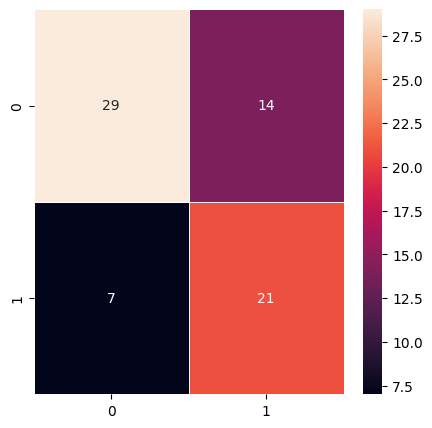

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cf, annot=True, linewidths=.5, ax=ax)

In [32]:
precision = (cf[0][0])/(cf[0][0]+cf[0][1])

In [33]:
print(precision)

0.6744186046511628
